In [1]:
!pip install langgraph langsmith


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 857.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.0/384.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


In [3]:
import os
os.environ["LANGCHAIN_API_KEY"]=""
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "liveLangGraph"

os.environ["LANGCHAIN_ENDPOINT"]="https://eu.api.smith.langchain.com"



In [4]:
from langchain_groq import ChatGroq
groq_api_key=""

In [5]:
llm=ChatGroq(model="gemma2-9b-it",groq_api_key=groq_api_key)

In [6]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ee633df1b40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ee633df0e80>, model_name='gemma2-9b-it', groq_api_key=SecretStr('**********'))

In [7]:
from langchain.schema import HumanMessage
message=HumanMessage(content="What is the capital of nepal")

In [8]:
llm([message])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


AIMessage(content='The capital of Nepal is **Kathmandu**. \n', response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 20, 'total_tokens': 33, 'completion_time': 0.026, 'prompt_time': 0.002451147, 'queue_time': None, 'total_time': 0.028451147}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-878c9ecd-bd72-4904-84b9-309e1cbceccd-0', usage_metadata={'input_tokens': 20, 'output_tokens': 13, 'total_tokens': 33})

In [9]:
# simple chatbot using langgraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END # structure of chatbot StateGraph ,start is start of the chatbot and end is the  end of the chatbot
from langgraph.graph.message import add_messages

Here is the extracted text from the image:

---

The first thing you do when you define a graph is define the State of the graph. The State consists of the schema of the graph as well as reducer functions which specify how to apply updates to the state. In our example State is a TypedDict with a single key: messages. The messages key is annotated with the add_messages reducer function, which tells LangGraph to append new messages to the existing list, rather than overwriting it. State keys without an annotation will be overwritten by each update, storing the most recent value.

```python
class State(TypedDict):
    # Messages have the type “list”. The “add_messages” function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder=StateGraph(State)
```

---

This text should match the content visible in your image.

In [10]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [11]:
def chatbot(state:State):
  return {"messages":[llm.invoke(state["messages"])]}


In [12]:
graph_builder.add_node("chatbot",chatbot)

In [13]:
graph_builder

In [14]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)


In [15]:
graph=graph_builder.compile()

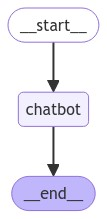

In [16]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  print("mermaid not installed")

In [17]:
while True:
  user_input=input("user:")
  if user_input.lower()=="exit":
    print("chatbot:""GOODBYE")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant:",value['messages'][-1].content)



user:exit
chatbot:GOODBYE


In [18]:
### Graph with multiple nodes
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode,tools_condition#tools_condition(wehen we should use this node)



In [19]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=30e1a28614884f2521dcb59f59a02d12933cd0d1cd5be8f01c2a910614ccf1ed
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=21d7b0d8018737fad70ce17fdc0584e68647c2e18e78ff4bf87e87a5bc12a190
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k



    WikipediaAPIWrapper: This is a class (likely from LangChain) that provides a convenient way to interact with the Wikipedia API. It handles tasks like searching for Wikipedia articles and extracting their content.
    top_k_results=1: This tells the wrapper to return only the single most relevant Wikipedia article when you perform a search. This is useful when you want a focused and specific result.
    doc_content_chars_max=200: This limits the length of the content extracted from Wikipedia articles to a maximum of 200 characters. This can help with:
        Faster Processing: Shorter content is quicker to analyze.
        Concise Summaries: You'll get a brief overview of the article rather than the entire text.


In [20]:
## arxiv for arxiv search wikipedia is for wikipedia

In [21]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv and wikipedia Tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)
wikipedia_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=wikipedia_wrapper)
#

In [22]:
wiki.invoke("what is the capital city of nepal")

'Page: Kathmandu\nSummary: Kathmandu, officially Kathmandu Metropolitan City, is the National capital Territory and most powerful city of Nepal with 845,767 inhabitants living in 105,649 households as o'

In [43]:
tools=[wiki,arxiv]

In [50]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

llm_with_tools=llm.bind_tools(tools=tools)

In [51]:
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [52]:
graph_builder.add_node("chatbot",chatbot)
tool_node=ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)


In [53]:
graph=graph_builder.compile()

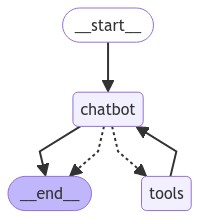

In [54]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  print("mermaid not installed")

In [55]:
user_input="Who is dr sanduk ruit?"
while True:
  events=graph.stream(
      {"messages":[("user",user_input)]},stream_mode="values"
  )
  for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Who is dr sanduk ruit?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_3vj0)
 Call ID: call_3vj0
  Args:
    query: Dr. Sanduk Ruit
================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

Dr. Sanduk Ruit is an ophthalmologist from Nepal who has restored the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_8413)
 Call ID: call_8413
  Args:
    query: Dr. Sanduk Ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

Dr. Sanduk Ruit is an ophthalmologist from Nepal. He has been involved in restoring the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_b75r)
 Call ID: call_b75r
  Args:
    query: Dr. Sanduk Ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

Dr. Sanduk Ruit is an ophthalmologist from Nepal who has helped restore the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_99jt)
 Call ID: call_99jt
  Args:
    query: Dr. Sanduk Ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

Dr. Sanduk Ruit is an ophthalmologist from Nepal. He has restored the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_p18f)
 Call ID: call_p18f
  Args:
    query: Dr. Sanduk Ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

Sanduk Ruit is an ophthalmologist from Nepal who has helped restore the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_k4ek)
 Call ID: call_k4ek
  Args:
    query: Dr. Sanduk Ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

He is an ophthalmologist from Nepal who has restored the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_e8rt)
 Call ID: call_e8rt
  Args:
    query: dr sanduk ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


================================== Ai Message ==================================

Sanduk Ruit is an ophthalmologist from Nepal who has restored the sight of over 180,000 people.
================================ Human Message =================================

Who is dr sanduk ruit?


================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_n7rh)
 Call ID: call_n7rh
  Args:
    query: dr sanduk ruit


================================= Tool Message =================================
Name: wikipedia

Page: Sanduk Ruit
Summary: Sanduk Ruit (Nepali: सन्दुक रूइत, pronounced [ˈsʌnduk rui̯t], born September 4, 1954) is an ophthalmologist from Nepal who was involved to restore the sight of over 180,000 


KeyboardInterrupt: 